In [484]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR 
from xgboost import XGBRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.ensemble import VotingRegressor,StackingRegressor

In [331]:
df = pd.read_csv('laptop_data.csv')
df.head(5)

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [332]:
df.info() 
# So here Ram Memory Weight all are Object instead of numerical data type so we have to improve that also then we have issue with unnamed column which is uuseless so we can drop that, There is no null values in the data that is good point..

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [333]:
# There is no Duplicate Values 
df.duplicated().sum()

np.int64(0)

In [334]:
# Dropping the Unnamed column from the database 
df.drop(columns=['Unnamed: 0'] , inplace=True)

In [335]:
# Replace the GB with Blank and convert into int value
df['Ram'] = df['Ram'].apply(lambda x :int(x.replace("GB" , "")))

In [336]:
df['Weight'] = df['Weight'].apply(lambda x : float(x.replace("kg","")))

In [337]:
df.head(4)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_12568\834922981.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'])


<Axes: xlabel='Price', ylabel='Density'>

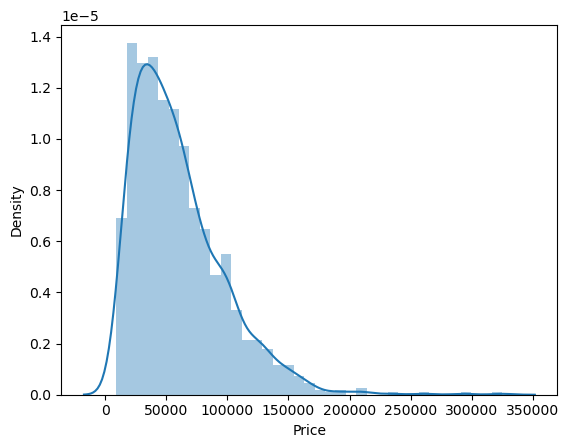

In [338]:
sns.distplot(df['Price'])

<Axes: xlabel='Company'>

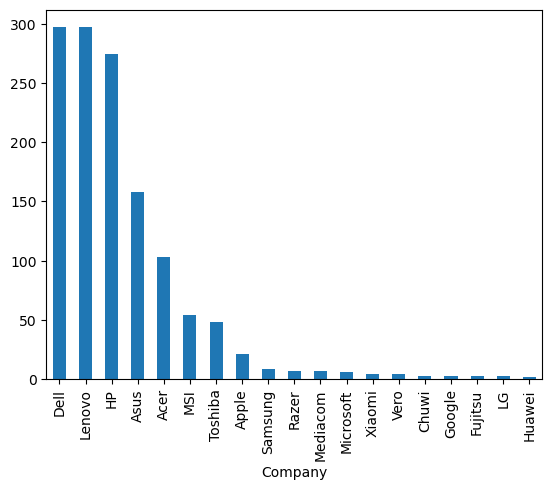

In [339]:
df['Company'].value_counts().plot(kind='bar')

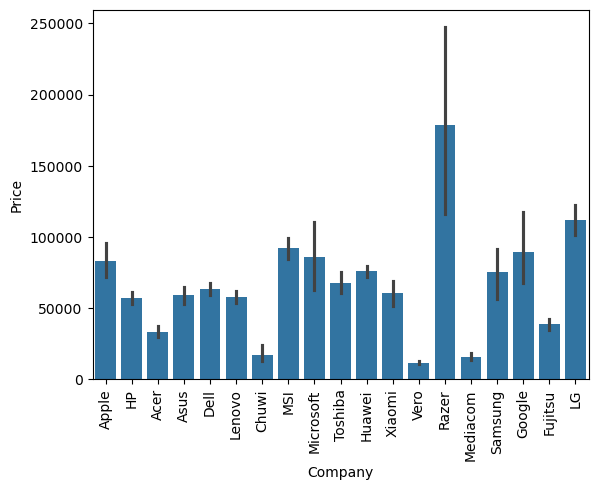

In [340]:
# Lets check company vs price 
sns.barplot(x = df['Company'] , y = df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [341]:
# Average price of laptop as per the company made
df.groupby('Company')['Price'].mean()

Company
Acer          33394.615969
Apple         83340.499886
Asus          58830.143878
Chuwi         16745.726400
Dell          63193.755782
Fujitsu       38841.120000
Google        89386.080000
HP            56891.044222
Huawei        75870.720000
LG           111834.720000
Lenovo        57882.563200
MSI           92116.226133
Mediacom      15717.600000
Microsoft     85903.788000
Razer        178282.491429
Samsung       75308.320000
Toshiba       67549.050000
Vero          11584.404000
Xiaomi        60390.882000
Name: Price, dtype: float64

<Axes: xlabel='TypeName'>

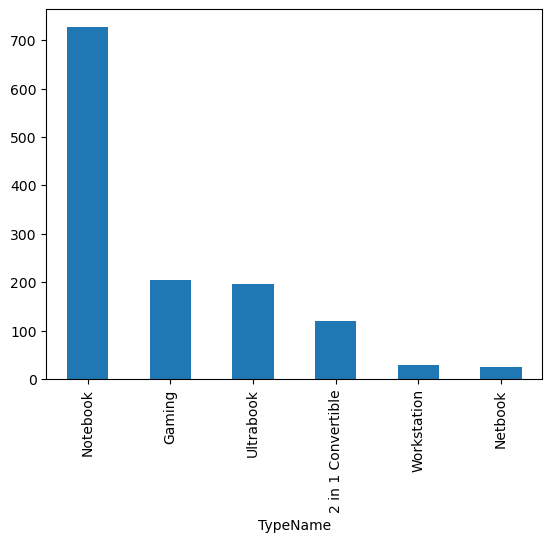

In [342]:
# How many types of laptop is there
df['TypeName'].value_counts().plot(kind='bar')

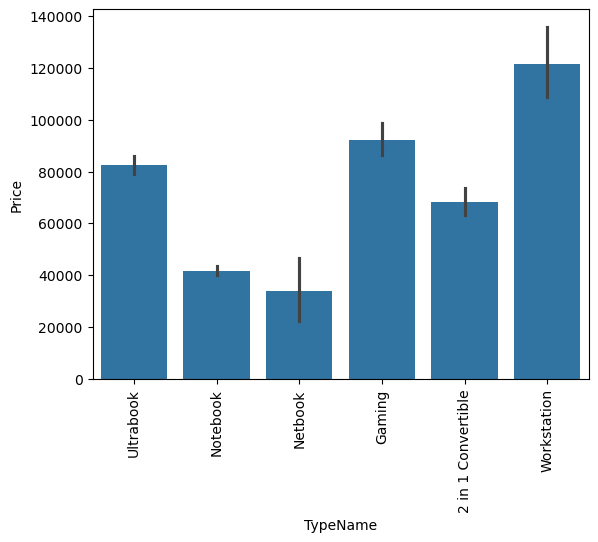

In [343]:
# Type vs Price
sns.barplot(x=df['TypeName'], y = df['Price'])
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='Inches', ylabel='Price'>

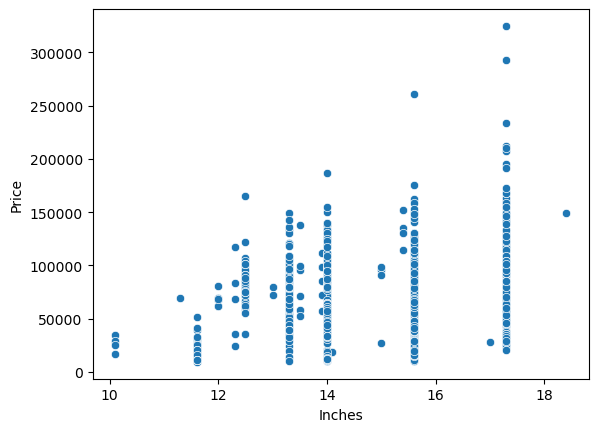

In [344]:
sns.scatterplot(x=df['Inches'],y=df['Price'])

In [345]:
df.ScreenResolution.value_counts()

ScreenResolution
Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x14

In [346]:
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x : 1 if 'Touchscreen' in x else 0)

<Axes: xlabel='Touchscreen'>

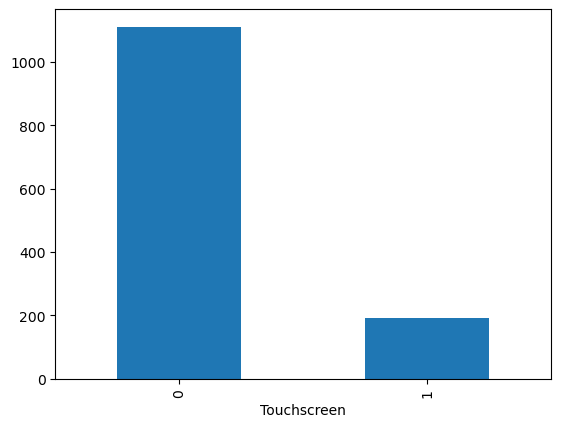

In [347]:
df['Touchscreen'].value_counts().plot(kind='bar')

<Axes: xlabel='Touchscreen', ylabel='Price'>

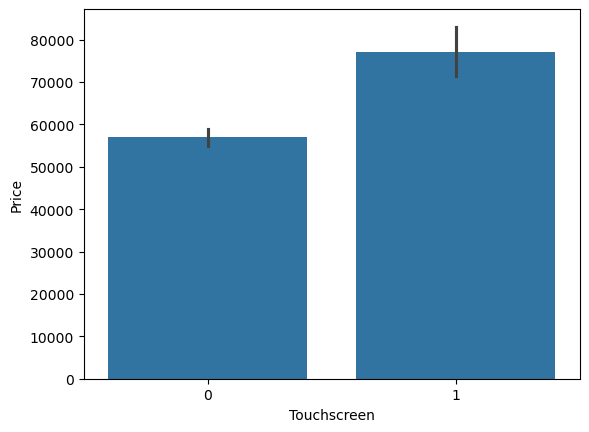

In [348]:
# Lets take cordination between Touchscreen and the Price
sns.barplot(x=df['Touchscreen'] , y=df['Price'])

In [349]:
# Finding wheather the laptop has IPS or not
df['IPS_Panel'] = df['ScreenResolution'].apply(lambda x : 1 if "IPS Panel" in x else 0 )

<Axes: xlabel='IPS_Panel'>

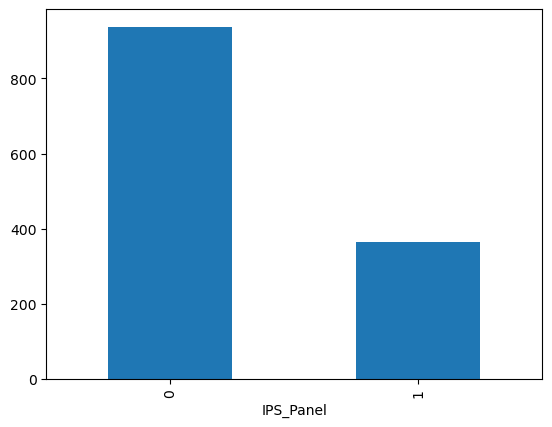

In [350]:
df['IPS_Panel'].value_counts().plot(kind='bar')

In [351]:
df['x_res'] = df['ScreenResolution'].apply(lambda x : int((x.split()[-1]).split('x')[0]))

In [352]:
df['y_res'] = df['ScreenResolution'].apply(lambda x : int((x.split()[-1]).split('x')[1]))

In [353]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS_Panel,x_res,y_res
1245,Asus,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows 10,2.50,85248.00,0,1,1920,1080
1208,Acer,Notebook,17.3,1600x900,Intel Core i3 6006U 2.0GHz,8,1TB HDD,Nvidia GeForce 940MX,Windows 10,3.30,33513.12,0,0,1600,900
1071,HP,Notebook,15.6,1366x768,Intel Core i5 6200U 2.3GHz,4,500GB HDD,Intel HD Graphics 520,Windows 10,2.31,63882.72,0,0,1366,768
138,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,4,1TB HDD,Nvidia GeForce 920MX,No OS,2.20,26586.72,0,0,1920,1080
253,Lenovo,2 in 1 Convertible,13.9,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 8550U 1.8GHz,8,512GB SSD,Intel UHD Graphics 620,Windows 10,1.37,98514.72,1,1,1920,1080


In [354]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int64  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float64
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  IPS_Panel         1303 non-null   int64  
 13  x_res             1303 non-null   int64  
 14  y_res             1303 non-null   int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 152.8+ KB


In [355]:
# Making a new Feature which is PPI
df['ppi'] = (((df['x_res'] ** 2) + (df['y_res'] ** 2 ))**0.5/df['Inches']).astype(float)

In [356]:
df.corr(numeric_only=True)['Price']

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
IPS_Panel      0.252208
x_res          0.556529
y_res          0.552809
ppi            0.473487
Name: Price, dtype: float64

In [357]:
df.drop(columns=['ScreenResolution','Inches','x_res','y_res'] , inplace= True)

In [358]:
df.sample(5)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS_Panel,ppi
700,Dell,Gaming,Intel Core i5 7300HQ 2.5GHz,8,1TB HDD,Nvidia GeForce GTX 1050,Windows 10,2.56,43636.32,0,0,141.211998
1102,Acer,Notebook,Intel Celeron Dual Core 3205U 1.5GHz,4,16GB SSD,Intel HD Graphics,Chrome OS,2.20,11135.52,0,0,100.454670
1216,Acer,Notebook,Intel Core i3 6006U 2GHz,4,1TB HDD,Nvidia GeForce 940MX,Windows 10,3.30,31861.44,0,0,106.113062
716,Dell,Notebook,Intel Core i5 7300U 2.6GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.90,62817.12,0,0,141.211998
484,Lenovo,Notebook,Intel Core i3 6006U 2.0GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,2.30,30103.20,0,0,100.454670


In [359]:
# Working on the CPU Column
df['Cpu'].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: count, Length: 118, dtype: int64

In [360]:
df['cpu_name'] = df['Cpu'].apply(lambda x : " ".join(x.split()[0:3]))

In [361]:
df.sample(5)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS_Panel,ppi,cpu_name
1285,Lenovo,2 in 1 Convertible,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,79866.72,1,1,276.053530,Intel Core i7
1224,Dell,2 in 1 Convertible,Intel Core i3 7100U 2.4GHz,4,500GB HDD,Intel HD Graphics 620,Windows 10,2.08,27119.52,1,0,146.860478,Intel Core i3
1293,Lenovo,Notebook,Intel Core i7 6700HQ 2.6GHz,8,1TB HDD,Nvidia GeForce GTX 960M,Windows 10,2.60,47898.72,0,1,141.211998,Intel Core i7
391,Asus,Gaming,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows 10,3.00,84768.48,0,0,127.335675,Intel Core i7
730,Acer,Gaming,Intel Core i7 6700HQ 2.6GHz,16,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,4.20,103096.80,0,1,127.335675,Intel Core i7


In [362]:
df['cpu_brand'] = df['cpu_name'].apply(lambda x : x if (x == "Intel Core i7" or x == "Intel Core i5" or x == "Intel Core i3") else (
    'Other Intel Processor' if x.split()[0] == 'Intel' else 'AMD Processor'
))

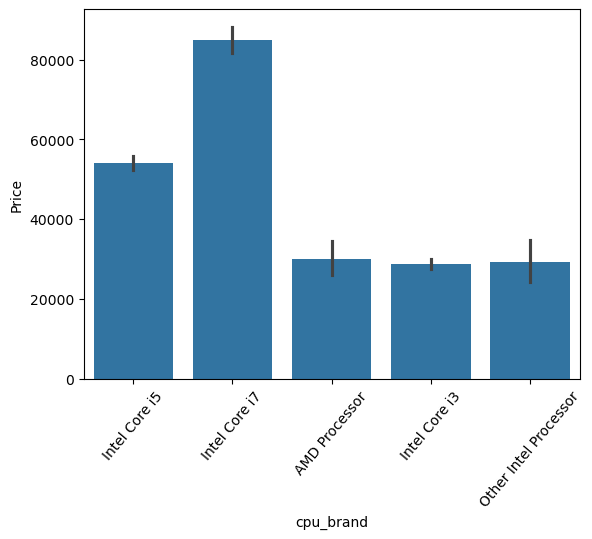

In [363]:
sns.barplot(x=df['cpu_brand'] , y=df['Price'])
plt.xticks(rotation=50)
plt.show()

In [364]:
df.drop(columns=['Cpu','cpu_name'],inplace=True)

<Axes: xlabel='Ram'>

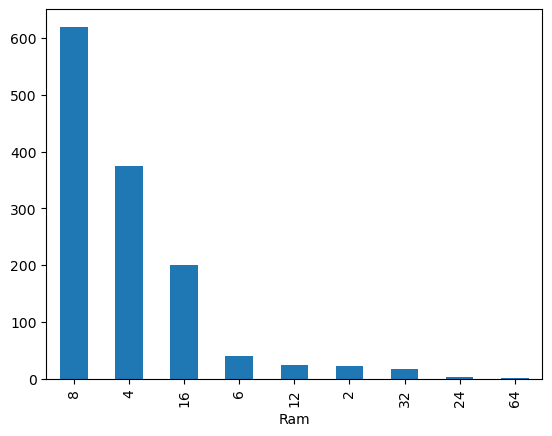

In [365]:
df['Ram'].value_counts().plot(kind='bar')

In [366]:
# Making the Memory Column ready for transformation
def find_SSD_val(text):
    text=text.strip()
    if 'TB' in text:
        if '.0TB' in text:
            text = text.replace('.0TB' , '000')
        else:
            text = text.replace('TB' , '000')
    if 'GB' in text:
        text = text.replace('GB' , '')
    if '+' in text:
        text = text.replace('Hybrid' , 'HDD')
    return text

In [367]:
# Adding a new easy column for memory for transformation
df['updated_memory'] = df['Memory'].apply(find_SSD_val)

In [368]:
# Create a new SSD making function 
def make_SSD_column(text):
    ssd = 0
    if 'SSD' in text and '+' in text:
        spl = text.split('+')
        for word in spl :
            if 'SSD' in word:
                word = word.replace("GB" , "")
                word = word.replace("SSD" , "")
                word = int(word.strip())
                ssd = word
    if 'SSD' in text and '+' not in text:
        ssd = int(text.replace("GB" , "").replace('SSD','').strip())
    return ssd 

In [369]:
df['ssd'] = df['updated_memory'].apply(make_SSD_column)

In [370]:
# Create a new HDD making function
def make_HDD_column(text):
    hdd=0
    if 'HDD' in text and '+' in text:
        spl = text.split('+')
        for word in spl :
            if 'HDD' in word:
                word = word.replace("GB" , "")
                word = word.replace("HDD" , "")
                word = int(word.strip())
                hdd = word
    if 'HDD' in text and '+' not in text:
        hdd = int(text.replace("GB" , "").replace('HDD','').strip())
    return hdd

In [373]:
df['hdd'] = df['updated_memory'].apply(make_HDD_column)

In [407]:
df.sample(5)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS_Panel,ppi,cpu_brand,updated_memory,ssd,hdd,hybrid
1041,Vero,Notebook,2,32GB Flash Storage,Intel HD Graphics 400,Windows 10,1.45,11231.424,0,0,111.935204,Other Intel Processor,32 Flash Storage,0,0,0
65,Asus,Ultrabook,16,512GB SSD,Nvidia GeForce GTX 1050 Ti,Windows 10,1.80,105654.240,0,0,141.211998,Intel Core i7,512 SSD,512,0,0
982,Lenovo,Notebook,6,256GB SSD,AMD Radeon 530,Windows 10,2.20,29250.720,0,0,141.211998,AMD Processor,256 SSD,256,0,0
762,Google,Ultrabook,8,256GB SSD,Intel HD Graphics 615,Chrome OS,1.10,83063.520,1,0,234.507400,Intel Core i5,256 SSD,256,0,0
128,Dell,Notebook,16,256GB SSD + 2TB HDD,AMD Radeon 530,Windows 10,2.80,74378.880,0,0,127.335675,Intel Core i7,256 SSD + 2000 HDD,256,2000,0


In [391]:
# Updated Hybrid column
df['hybrid'] = df['updated_memory'].apply(lambda x : int(x.split()[0]) if "Hybrid" in x else 0)

In [393]:
df.drop(columns=['Hybrid'],inplace=True)

In [410]:
df['flash_storage'] = df['updated_memory'].apply(lambda x : int(x.split()[0]) if 'Flash Storage' in x else 0)

In [412]:
df.drop(columns=['updated_memory'] , inplace= True)

In [413]:
df.sample(5)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS_Panel,ppi,cpu_brand,ssd,hdd,hybrid,flash_storage
420,Lenovo,2 in 1 Convertible,16,512GB SSD,Nvidia GeForce GTX 1050,Windows 10,2.00,101178.7200,1,1,282.423996,Intel Core i7,512,0,0,0
1090,Dell,Notebook,4,500GB HDD,Intel HD Graphics,Linux,2.20,20965.1472,0,0,100.454670,Other Intel Processor,0,500,0,0
1071,HP,Notebook,4,500GB HDD,Intel HD Graphics 520,Windows 10,2.31,63882.7200,0,0,100.454670,Intel Core i5,0,500,0,0
319,Acer,Notebook,4,128GB Flash Storage,Intel HD Graphics 405,Windows 10,1.40,25840.8000,0,0,135.094211,Other Intel Processor,0,0,0,128
634,Asus,Notebook,8,1TB HDD,Intel HD Graphics 500,Windows 10,2.00,21258.7200,0,0,100.454670,Other Intel Processor,0,1000,0,0


In [ ]:
# This shows that now we dont need to memory column so now lets remove that column our feature splitting is perfect
df[(df['ssd'] == 0) & (df['hdd'] == 0) & (df['hybrid'] == 0) & (df['flash_storage'] == 0)]

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS_Panel,ppi,cpu_brand,ssd,hdd,hybrid,flash_storage


In [415]:
df.drop(columns=['Memory'] , inplace= True)

In [416]:
df.sample(5)

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS_Panel,ppi,cpu_brand,ssd,hdd,hybrid,flash_storage
373,Lenovo,Notebook,4,AMD Radeon R5,Windows 10,2.60,26053.9200,0,0,106.113062,AMD Processor,128,0,0,0
835,Dell,Gaming,16,Nvidia GeForce GTX 1070,Windows 10,3.21,147832.2864,0,0,141.211998,Intel Core i7,256,1000,0,0
1083,HP,Ultrabook,16,Intel HD Graphics 620,Windows 10,1.30,109170.7200,0,1,331.264236,Intel Core i7,512,0,0,0
160,Asus,Notebook,4,AMD Radeon R5 M420,Windows 10,2.03,21471.8400,0,0,100.454670,AMD Processor,0,1000,0,0
793,Lenovo,2 in 1 Convertible,8,AMD Radeon R7 M460,Windows 10,2.08,51095.5200,1,0,141.211998,Intel Core i5,256,0,0,0


In [417]:
df.corr(numeric_only=True)['Price']

Ram              0.743007
Weight           0.210370
Price            1.000000
Touchscreen      0.191226
IPS_Panel        0.252208
ppi              0.473487
ssd              0.676250
hdd             -0.087630
hybrid          -0.040147
flash_storage   -0.040511
Name: Price, dtype: float64

In [418]:
# Here we can see that Hybrid and Flash storage is not corr with anyone of them so lets drop that 
df.drop(columns=['hybrid','flash_storage'],inplace= True)

In [419]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS_Panel,ppi,cpu_brand,ssd,hdd
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,128,0
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,256,0
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,512,0
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,256,0


In [420]:
# Lets work on GPU
df['Gpu'].value_counts()

Gpu
Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: count, Length: 110, dtype: int64

In [424]:
# So here we have to extract the brand name from the GPU col as there is 110 total category and its hard for us 
df['GpuBrand'] = df['Gpu'].apply(lambda x : x.split()[0])

In [430]:
df['GpuBrand'].value_counts()
# So there is useless ARM GPU laptop its count is only 1 so lets remove that

GpuBrand
Intel     722
Nvidia    400
AMD       180
Name: count, dtype: int64

In [429]:
df = df[df['GpuBrand'] != 'ARM']

<Axes: xlabel='GpuBrand', ylabel='Price'>

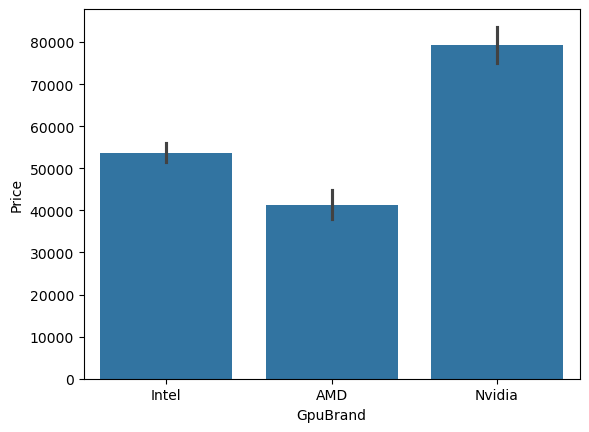

In [431]:
sns.barplot(x=df['GpuBrand'] , y=df['Price'])

In [432]:
df.drop(columns=['Gpu'], inplace= True)

In [433]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,IPS_Panel,ppi,cpu_brand,ssd,hdd,GpuBrand
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,128,0,Intel
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,256,0,Intel
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,512,0,AMD
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,256,0,Intel


In [434]:
# LEts work on Opsys
df['OpSys'].value_counts()

OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

In [437]:
# Lets make Opsys look better
df['os'] = df['OpSys'].apply(lambda x : 'Windows' if ('Windows 10' in x or 'Windows 7' in x or 'Windows 10 S' in x) else (
    'Mac' if ('Mac OS X' in x or 'macOS' in x) else 'Others/No OS/Linux'  
))

In [444]:
df.sample(5)

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,IPS_Panel,ppi,cpu_brand,ssd,hdd,GpuBrand,os
1299,Lenovo,2 in 1 Convertible,16,Windows 10,1.30,79866.72,1,1,276.053530,Intel Core i7,512,0,Intel,Windows
390,Asus,Gaming,8,Windows 10,3.00,55357.92,0,0,127.335675,Intel Core i7,0,1000,Nvidia,Windows
45,Apple,Ultrabook,8,macOS,1.37,75604.32,0,1,226.983005,Intel Core i5,256,0,Intel,Mac
201,Lenovo,Notebook,4,Windows 10,2.10,26267.04,0,0,100.454670,Intel Core i5,128,0,Intel,Windows
1084,Dell,Notebook,8,Windows 10,2.18,39960.00,0,0,141.211998,Intel Core i5,256,0,Intel,Windows


In [445]:
df.drop(columns=['OpSys'] , inplace= True)

In [446]:
df.sample(5)

,Company,TypeName,Ram,Weight,Price,Touchscreen,IPS_Panel,ppi,cpu_brand,ssd,hdd,GpuBrand,os
872,Toshiba,Notebook,8,2.00,73952.64,0,1,141.211998,Intel Core i7,256,0,Intel,Windows
535,Dell,Notebook,8,1.93,72940.32,0,0,141.211998,Intel Core i7,256,0,Nvidia,Windows
59,Asus,Notebook,4,2.00,22111.20,0,0,141.211998,Intel Core i3,256,0,Intel,Others/No OS/Linux
669,Acer,Notebook,4,2.10,21951.36,0,0,100.454670,Intel Core i3,128,0,Intel,Others/No OS/Linux
599,Dell,Workstation,8,2.06,93932.64,1,0,141.211998,Intel Core i7,256,0,Nvidia,Windows


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_12568\2554633198.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Weight'])


<Axes: xlabel='Weight', ylabel='Density'>

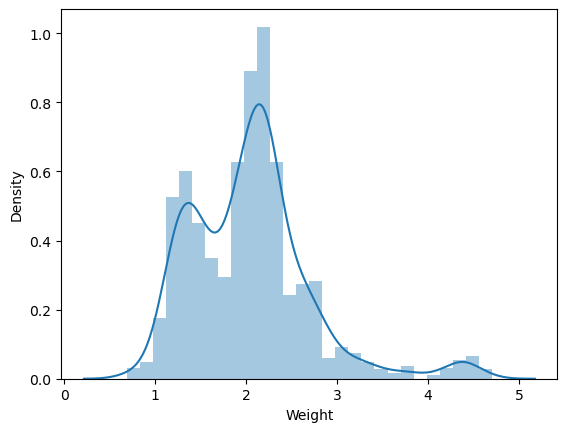

In [447]:
# Lets work on weight
sns.distplot(df['Weight'])

<Axes: >

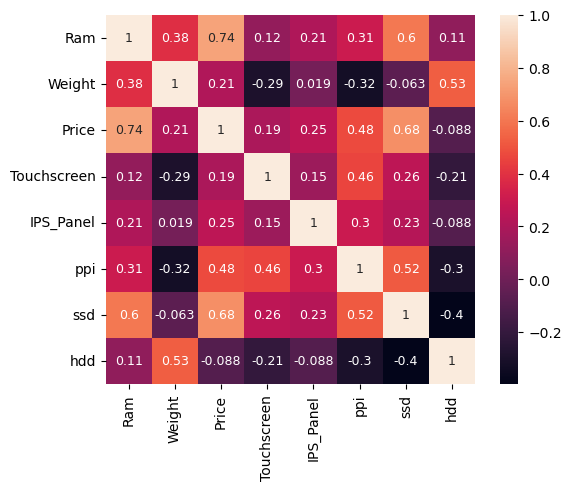

In [452]:
sns.heatmap(df.corr(numeric_only=True) , annot=True,square=True,annot_kws={'size' : 9})

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_12568\834922981.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'])


<Axes: xlabel='Price', ylabel='Density'>

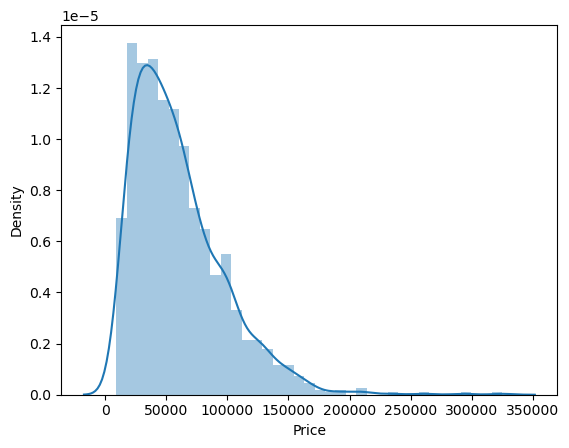

In [456]:
sns.distplot(df['Price'])

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_12568\574291374.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df['Price']))


<Axes: xlabel='Price', ylabel='Density'>

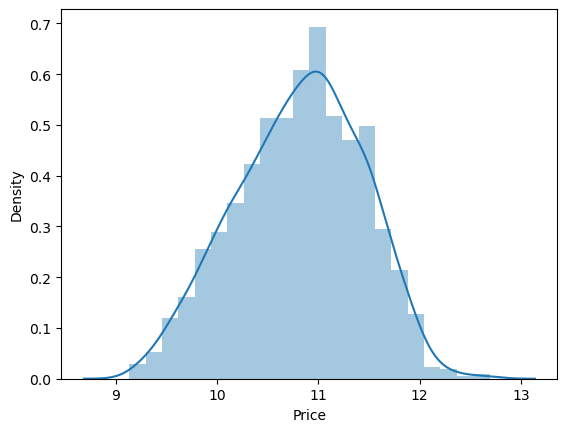

In [457]:
# The above Chart is little bit skewed so we have to make it proper distribution graph
sns.distplot(np.log(df['Price']))

In [458]:
x = df.drop(columns=['Price'])
y = np.log(df['Price'])

In [463]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.15,random_state=2)

In [468]:
x_train.sample()

,Company,TypeName,Ram,Weight,Touchscreen,IPS_Panel,ppi,cpu_brand,ssd,hdd,GpuBrand,os
1234,Apple,Ultrabook,4,1.08,0,0,135.094211,Intel Core i5,0,0,Intel,Mac


**Linear Regression**

In [472]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf' , OneHotEncoder(sparse_output= False,drop='first'), [0,1,7,10,11]) # Based on the X_train
],remainder='passthrough')

step2 = LinearRegression()

pipe = make_pipeline(step1,step2)
pipe.fit(x_train,y_train)
y_pred = pipe.predict(x_test)
print('R2 Score :- ', r2_score(y_test,y_pred))
print('MEA :- ', mean_absolute_error(y_test,y_pred))

R2 Score :-  0.8082142499694511
MEA :-  0.20884070040261865


In [ ]:
np.exp(0.208840)    # this amount of ruppe is error ha ha ha 

np.float64(1.2322478231049447)

**Ridge Regression**

In [474]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf' , OneHotEncoder(sparse_output= False,drop='first'), [0,1,7,10,11]) # Based on the X_train
],remainder='passthrough')

step2 = Ridge(alpha=10)

pipe = make_pipeline(step1,step2)
pipe.fit(x_train,y_train)
y_pred = pipe.predict(x_test)
print('R2 Score :- ', r2_score(y_test,y_pred))
print('MEA :- ', mean_absolute_error(y_test,y_pred))

R2 Score :-  0.8141938577186156
MEA :-  0.20780452249546869


**Lasso Regression**

In [475]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf' , OneHotEncoder(sparse_output= False,drop='first'), [0,1,7,10,11]) # Based on the X_train
],remainder='passthrough')

step2 = Lasso(alpha=0.001)

pipe = make_pipeline(step1,step2)
pipe.fit(x_train,y_train)
y_pred = pipe.predict(x_test)
print('R2 Score :- ', r2_score(y_test,y_pred))
print('MEA :- ', mean_absolute_error(y_test,y_pred))

R2 Score :-  0.8085231365575518
MEA :-  0.2095923084172071


**KNN**

In [476]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf' , OneHotEncoder(sparse_output= False,drop='first'), [0,1,7,10,11]) # Based on the X_train
],remainder='passthrough')

step2 = KNeighborsRegressor(n_neighbors=3)

pipe = make_pipeline(step1,step2)
pipe.fit(x_train,y_train)
y_pred = pipe.predict(x_test)
print('R2 Score :- ', r2_score(y_test,y_pred))
print('MEA :- ', mean_absolute_error(y_test,y_pred))

R2 Score :-  0.80504821085444
MEA :-  0.19209874364918822


**Decision Tree**

In [477]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf' , OneHotEncoder(sparse_output= False,drop='first'), [0,1,7,10,11]) # Based on the X_train
],remainder='passthrough')

step2 = DecisionTreeRegressor(max_depth=8)

pipe = make_pipeline(step1,step2)
pipe.fit(x_train,y_train)
y_pred = pipe.predict(x_test)
print('R2 Score :- ', r2_score(y_test,y_pred))
print('MEA :- ', mean_absolute_error(y_test,y_pred))

R2 Score :-  0.8278431057081563
MEA :-  0.1873862613422829


**SVM**

In [478]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf' , OneHotEncoder(sparse_output= False,drop='first'), [0,1,7,10,11]) # Based on the X_train
],remainder='passthrough')

step2 = SVR(kernel='rbf',C=10000,epsilon=0.1)

pipe = make_pipeline(step1,step2)
pipe.fit(x_train,y_train)
y_pred = pipe.predict(x_test)
print('R2 Score :- ', r2_score(y_test,y_pred))
print('MEA :- ', mean_absolute_error(y_test,y_pred))

R2 Score :-  0.8199015689234694
MEA :-  0.19710255759724798


**Random Forest**

In [485]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf' , OneHotEncoder(sparse_output= False,drop='first'), [0,1,7,10,11]) # Based on the X_train
],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)

pipe = make_pipeline(step1,step2)
pipe.fit(x_train,y_train)
y_pred = pipe.predict(x_test)
print('R2 Score :- ', r2_score(y_test,y_pred))
print('MEA :- ', mean_absolute_error(y_test,y_pred))

R2 Score :-  0.8839197143172466
MEA :-  0.15977317192435028


**Extra Tree**

In [481]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf' , OneHotEncoder(sparse_output= False,drop='first'), [0,1,7,10,11]) # Based on the X_train
],remainder='passthrough')

step2 = ExtraTreesRegressor(n_estimators=100,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15,bootstrap=True)

pipe = make_pipeline(step1,step2)
pipe.fit(x_train,y_train)
y_pred = pipe.predict(x_test)
print('R2 Score :- ', r2_score(y_test,y_pred))
print('MEA :- ', mean_absolute_error(y_test,y_pred))

R2 Score :-  0.8811743279438315
MEA :-  0.1620666177464524


**Ada Boost**

In [482]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf' , OneHotEncoder(sparse_output= False,drop='first'), [0,1,7,10,11]) # Based on the X_train
],remainder='passthrough')

step2 = AdaBoostRegressor(n_estimators=15,learning_rate=1.0)

pipe = make_pipeline(step1,step2)
pipe.fit(x_train,y_train)
y_pred = pipe.predict(x_test)
print('R2 Score :- ', r2_score(y_test,y_pred))
print('MEA :- ', mean_absolute_error(y_test,y_pred))

R2 Score :-  0.7905106323132711
MEA :-  0.23314282061352504


**XG Boost**

In [483]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf' , OneHotEncoder(sparse_output= False,drop='first'), [0,1,7,10,11]) # Based on the X_train
],remainder='passthrough')

step2 = XGBRegressor(n_estimators=45,max_depth=5,learning_rate=0.5)

pipe = make_pipeline(step1,step2)
pipe.fit(x_train,y_train)
y_pred = pipe.predict(x_test)
print('R2 Score :- ', r2_score(y_test,y_pred))
print('MEA :- ', mean_absolute_error(y_test,y_pred))

R2 Score :-  0.883690811760437
MEA :-  0.1592880651095771


In [487]:
df.head()

,Company,TypeName,Ram,Weight,Price,Touchscreen,IPS_Panel,ppi,cpu_brand,ssd,hdd,GpuBrand,os
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,128,0,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,256,0,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,220.534624,Intel Core i7,512,0,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,226.983005,Intel Core i5,256,0,Intel,Mac


In [488]:
# Exporting the Model
import pickle
pickle.dump(df , open('lapidata.pkl' , 'wb'))
pickle.dump(pipe , open('pipe.pkl' , 'wb'))

In [490]:
x_train.head()

,Company,TypeName,Ram,Weight,Touchscreen,IPS_Panel,ppi,cpu_brand,ssd,hdd,GpuBrand,os
183,Toshiba,Notebook,8,2.00,0,0,100.454670,Intel Core i5,128,0,Intel,Windows
1141,MSI,Gaming,8,2.40,0,0,141.211998,Intel Core i7,128,1000,Nvidia,Windows
1049,Asus,Netbook,4,1.20,0,0,135.094211,Other Intel Processor,0,0,Intel,Others/No OS/Linux
1020,Dell,2 in 1 Convertible,4,2.08,1,1,141.211998,Intel Core i3,0,1000,Intel,Windows
878,Dell,Notebook,4,2.18,0,0,141.211998,Intel Core i5,128,1000,Nvidia,Windows
